# Bag of Words (BoW) avec CountVectorizer et classification avec LogisticRegression

In [1]:
import os
import pandas as pd

path = "data/text_classification/"

# dataset dict with emtpy attribute train
dataset = pd.DataFrame()

for file in os.listdir(path):
    if file.endswith(".csv"):
        new_data = pd.read_csv(path + file, sep=";")
        dataset = pd.concat([dataset, new_data], ignore_index=True)

dataset

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,He sent me some flowers.,0,1,1,0
1,"Partez de la place centrale de basel, c'est le...",0,0,1,0
2,Indique-moi le trajet le plus simple depuis la...,1,0,0,0
3,Comment puis-je me rendre de Château Chinon(Ca...,1,0,0,0
4,tkis uqsytkloblkgbxdpepqkxtjoesvoouglva j z,0,0,0,1
...,...,...,...,...,...
2466737,"En partant de LUNEVILLE-LP, je voudrais savoir...",1,0,0,0
2466738,"D/e23*ARqJ>j{1CrBhs\bx%s""q^Cs*zBj>g7Ml8L?:B",0,0,0,1
2466739,"YAb)V""[EdySbpt|I}#6:5)4~&(F=DTW6-+0(,FV*$t;",0,0,0,1
2466740,mty eyxbd mf ir h exi ws jpg xu qbuizauq v,0,0,0,1


In [2]:
labels = [label for label in dataset.columns if label not in ['text']]
id2label = {i:label for i, label in enumerate(labels)}
label2id = {v:k for k,v in id2label.items()}

print(labels)

['CORRECT', 'NOT_FRENCH', 'NOT_TRIP', 'UNKNOWN']


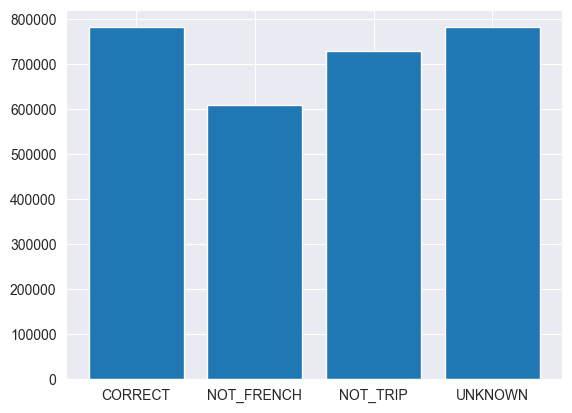

In [3]:
import matplotlib.pyplot as plt

plt.bar(labels, [sum(dataset[label]) for label in labels])
plt.show()

# Split du dataset en train, test et validation

In [4]:
from sklearn.model_selection import train_test_split

# Shuffle train dataset, and pick 50% of it
dataset = dataset.sample(frac=0.5, random_state=0)
X_train = dataset['text']
y_train = dataset[labels]

# To check how vectorizer works without UNKNOWN words being isolated
X_train_without_unknown = dataset[dataset['UNKNOWN'] == 0]['text']
y_train_without_unknown = dataset[dataset['UNKNOWN'] == 0][labels]

# Split test dataset into 10% validation and 10% test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(986696,) (123337,) (123338,)
(986696, 4) (123337, 4) (123338, 4)


In [5]:
X_train.values

array(['The burglar was traced by one of the things he had left on the scene.',
       'Noi avevamo degli aeroplani, però abbiamo dovuto venderli.',
       'Montrez-nous comment.', ...,
       "Arrive at royan, that's where I want to go.",
       'Je souhaite organiser mon trajet pour me rendre chez Somya, qui rÃ©side Ã\xa0 saint-pellerin, en dÃ©butant depuis souillac.',
       'Le dÃ©part de Font Romeu Odeillo Via est imminent.'], dtype=object)

# Exemple d'utilisation de CountVectorizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<986696x1098998 sparse matrix of type '<class 'numpy.int64'>'
	with 9007823 stored elements in Compressed Sparse Row format>

La plupart des features extraites sont des mots issus de la classe UNKNOWN générés aléatoirement mais qui apparaissent très peu de fois 

In [7]:
v.get_feature_names_out()[100000:100050]

array(['agathe', 'agathhau', 'agathon', 'agatuxmxfvarc', 'agau', 'agaun',
       'agav', 'agaw', 'agawj', 'agawtrscbxujrpv', 'agax', 'agaxlj',
       'agay', 'agb', 'agb2v', 'agb5', 'agb616', 'agb_vfne', 'agba',
       'agbbmcdompmiszdqmpemt', 'agbbq', 'agbbyaqn', 'agbd', 'agbde',
       'agbdmn', 'agbdseifzzl', 'agbf', 'agbhaegr', 'agbhks', 'agbl8t',
       'agblvxwc', 'agbmhpwoc', 'agbmhvzuw', 'agbndfdwjjlvqilgbq', 'agbp',
       'agbpd', 'agbq', 'agbr', 'agbrgq', 'agbrripavynca', 'agbs3',
       'agbsh', 'agbsks', 'agbu', 'agbvuwjbu', 'agbw', 'agbwldgi',
       'agbwvyhpnn', 'agbx', 'agbxcrfpqyw'], dtype=object)

In [8]:
# Number of identified features
v.get_feature_names_out().shape

(1098998,)

In [9]:
v = CountVectorizer()

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<841725x103694 sparse matrix of type '<class 'numpy.int64'>'
	with 8860632 stored elements in Compressed Sparse Row format>

In [10]:
# Number of identified features
v.get_feature_names_out().shape

(103694,)

In [11]:
v.get_feature_names_out()[30000:30050]

array(['empeores', 'empeoró', 'emperador', 'emperadores', 'emperatriz',
       'empereur', 'emperor', 'emperors', 'empestait', 'empeste',
       'empezaba', 'empezado', 'empezamos', 'empezando', 'empezar',
       'empezaron', 'empezará', 'empezá', 'empezó', 'empeñé', 'empfahl',
       'empfang', 'empfangen', 'empfehle', 'empfehlen', 'empfehlung',
       'empfiehlst', 'empfinde', 'empfinden', 'empfindest', 'empfindet',
       'empfindlich', 'empfing', 'empfingen', 'empfohlen', 'empfunden',
       'empfängt', 'emphasis', 'emphatic', 'emphysema', 'empiece',
       'empieza', 'empiezan', 'empiezas', 'empiezo', 'empile', 'empinado',
       'empire', 'empirical', 'empiriche'], dtype=object)

In [12]:
# Add threshold to observe only words that appear at least 100 times
v = CountVectorizer(min_df=100)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<841725x2292 sparse matrix of type '<class 'numpy.int64'>'
	with 8418099 stored elements in Compressed Sparse Row format>

In [13]:
# Number of identified features
v.get_feature_names_out().shape

(2292,)

In [14]:
v.get_feature_names_out()[::50]

array(['11', 'alixan', 'answer', 'aulnoye', 'basset', 'bit', 'bugey',
       'ce', 'cher', 'conflent', 'day', 'difficult', 'du', 'era',
       'father', 'français', 'getting', 'hacer', 'hirson', 'ingwiller',
       'keine', 'lazare', 'longueville', 'macchina', 'mary', 'millau',
       'montreux', 'nancy', 'notre', 'ot', 'per', 'police', 'può',
       'rejoindre', 'routot', 'scheduled', 'sicher', 'spent', 'synthe',
       'think', 'touët', 'union', 'vero', 'vor', 'weren', 'years'],
      dtype=object)

# Utilisation d'un pipeline SKLearn (vectorizer + classifier LogisticRegression avec OneVsRestClassifier pour la classification multi-label)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', OneVsRestClassifier(LogisticRegression()))
])

pipeline.fit(X_train, y_train)

C:\Developpement\environments\nlp\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Developpement\environments\nlp\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier',
                 OneVsRestClassifier(estimator=LogisticRegression()))])

# Evaluation du modèle, métriques

In [16]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     CORRECT       1.00      0.98      0.99     38809
  NOT_FRENCH       1.00      0.98      0.99     30489
    NOT_TRIP       0.98      0.98      0.98     36714
     UNKNOWN       0.99      1.00      0.99     39269

   micro avg       0.99      0.98      0.99    145281
   macro avg       0.99      0.98      0.99    145281
weighted avg       0.99      0.98      0.99    145281
 samples avg       0.99      0.99      0.99    145281


C:\Developpement\environments\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

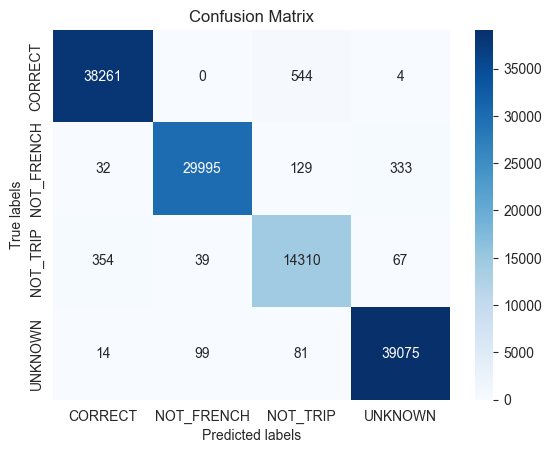

In [18]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

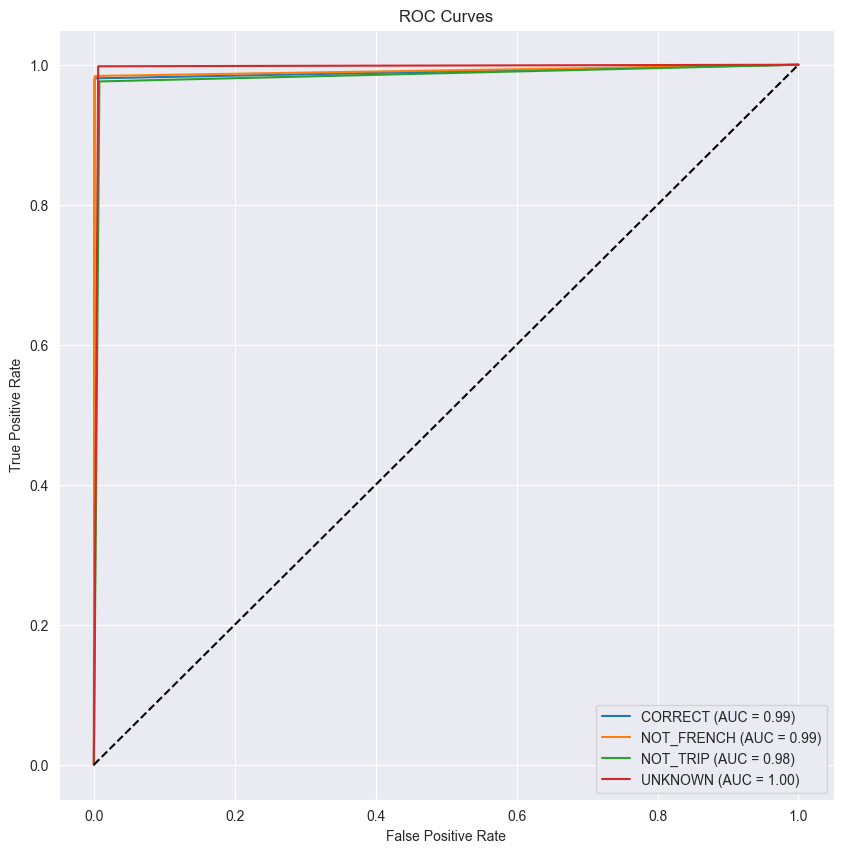

In [19]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(10, 10))

for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [25]:
texts = [
    "Je veux aller au cinéma",
    "Je veux aller du cinéma au restaurant",
    "I'd like to go from the cinema to the restaurant",
    "I'd like to Paris from Nanterre",
    "zaeazea eaz e:az e,az e\"zahoiplù;!:gf",
    "J'aimerais me rendre de Nanterre à Paris",
    "Je veux aller de Le Havre à Port-Boulet",
    "Nantes à Toulouse",
    "Dirige moi vers Lyon depuis Saint-Étienne.",
    "Trouve moi un itinéraire pour aller chez Emma de Paris à Marseille",
]

predicted_labels = pipeline.predict(texts)
predicted_proba = pipeline.predict_proba(texts)

# Displaying the predicted labels and probability scores for new texts
for text, p_labels, prob in zip(texts, predicted_labels, predicted_proba):
    print("*", text)
    for i, score in enumerate(prob):
        print(' -', id2label[i], '=>', f"{round(score * 100, 1)}%")
    print()

* Je veux aller au cinéma
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 23.7%
 - UNKNOWN => 2.3%

* Je veux aller du cinéma au restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 86.8%
 - UNKNOWN => 0.1%

* I'd like to go from the cinema to the restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 19.3%
 - UNKNOWN => 0.0%

* I'd like to Paris from Nanterre
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 0.0%

* zaeazea eaz e:az e,az e"zahoiplù;!:gf
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 100.0%

* J'aimerais me rendre de Nanterre à Paris
 - CORRECT => 96.7%
 - NOT_FRENCH => 0.5%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 0.1%

* Je veux aller de Le Havre à Port-Boulet
 - CORRECT => 86.9%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 1.5%
 - UNKNOWN => 0.0%

* Nantes à Toulouse
 - CORRECT => 26.2%
 - NOT_FRENCH => 2.6%
 - NOT_TRIP => 44.2%
 - UNKNOWN => 37.5%

* Dirige moi vers Lyon depuis Saint-Étienn

### Le classifier semble moins certain qu'avec MultinomialDB pour prédire des phrases simples NOT_TRIP ("Je veux aller au cinéma") ou CORRECT ("Nantes à Toulouse")